# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 5**
### **Normalización**

---

In [20]:
# Tratamiento de datos
# ----------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ----------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ----------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ----------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ----------------------------------
pd.options.display.max_columns = None 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


In [21]:
df_socio = pd.read_csv('../datos/datos-regresion-lineal/2-esperanza_vida_limpio.csv', index_col=0)
df_socio.head(2)

,country,region,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pollution_index,life_expectancy_at_birth_total,pop_using_improved_drinking_water
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.8,73.30,Muchos,139.59,58.40,37.37,53.33,76.372,97.25
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.4,74.25,Medios,176.54,101.94,57.58,24.58,82.500,100.00


- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


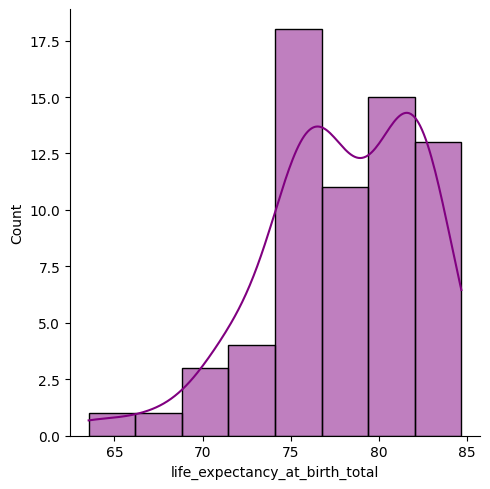

In [22]:
sns.displot(x='life_expectancy_at_birth_total', data=df_socio, kde = True, color = "purple");

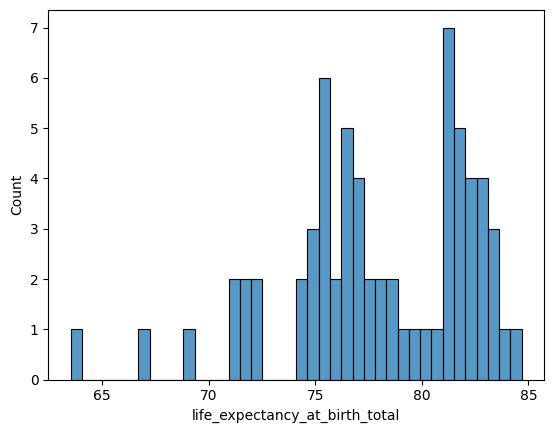

In [23]:
sns.histplot(x=df_socio['life_expectancy_at_birth_total'], bins = 40);

In [24]:
# Sacamos la normalización con el modelo de MinMaxScaler
# ----------------------------------

numericas = df_socio.select_dtypes(include=np.number)
numericas.head()

,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,quality_of_life_index,purchasing_power_index,safety_index,pollution_index,life_expectancy_at_birth_total,pop_using_improved_drinking_water
0,44.271,16.2,91.749,14564.5,4.8,73.30,139.59,58.40,37.37,53.33,76.372000,97.25
1,24.451,3.2,85.904,51352.2,9.4,74.25,176.54,101.94,57.58,24.58,82.500000,100.00
2,8.736,106.0,58.094,44117.7,11.2,80.91,190.37,95.66,80.75,21.90,81.643902,100.00
3,9.468,46.7,78.134,5750.8,5.7,53.76,119.23,36.43,77.74,39.64,74.129268,94.65
4,11.429,377.5,97.961,40277.8,10.6,78.92,160.52,91.02,55.49,48.92,81.492683,99.45


In [25]:
minmax = MinMaxScaler()
minmax.fit(df_socio[['life_expectancy_at_birth_total']])
vr_norm = minmax.transform(df_socio[['life_expectancy_at_birth_total']])

In [26]:
df_norm = pd.DataFrame(vr_norm, columns=['life_expectancy_at_birth_total_sk'])
df_norm.head()

,life_expectancy_at_birth_total_sk
0,0.607024
1,0.896867
2,0.856375
3,0.500947
4,0.849223


In [27]:
df_socio['life_expectancy_at_birth_total_sk'] = df_norm

In [28]:
df_socio.head()

,country,region,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pollution_index,life_expectancy_at_birth_total,pop_using_improved_drinking_water,life_expectancy_at_birth_total_sk
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.8,73.30,Muchos,139.59,58.40,37.37,53.33,76.372000,97.25,0.607024
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.4,74.25,Medios,176.54,101.94,57.58,24.58,82.500000,100.00,0.896867
2,Austria,WesternEurope,8.736,106.0,58.094,44117.7,11.2,80.91,Muchos,190.37,95.66,80.75,21.90,81.643902,100.00,0.856375
3,Belarus,EasternEurope,9.468,46.7,78.134,5750.8,5.7,53.76,Muchos,119.23,36.43,77.74,39.64,74.129268,94.65,0.500947
4,Belgium,WesternEurope,11.429,377.5,97.961,40277.8,10.6,78.92,Medios,160.52,91.02,55.49,48.92,81.492683,99.45,0.849223


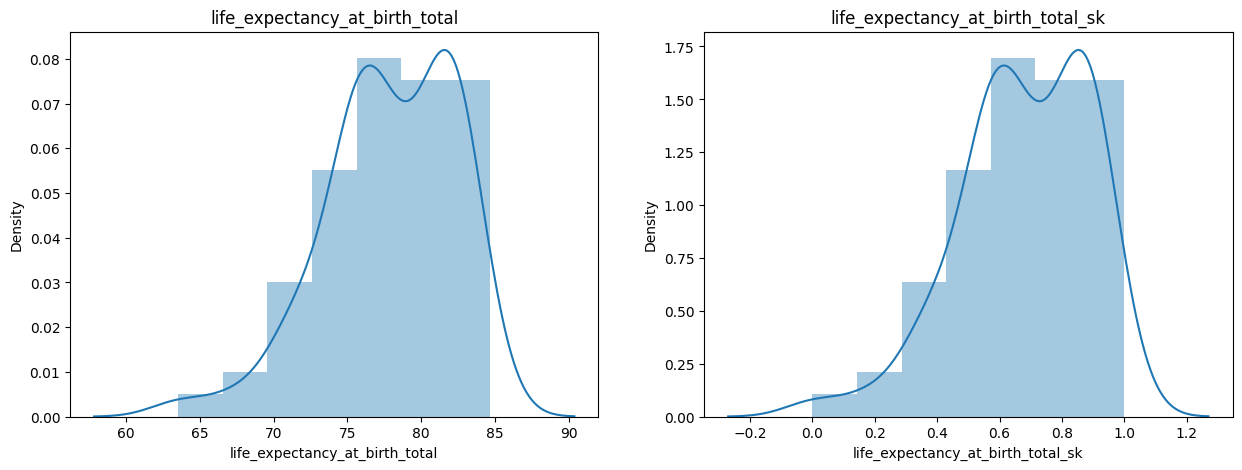

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('life_expectancy_at_birth_total')
axes[1].set_title('life_expectancy_at_birth_total_sk')

sns.distplot(df_socio['life_expectancy_at_birth_total'] ,ax = axes[0])
sns.distplot(df_socio['life_expectancy_at_birth_total_sk'], ax = axes[1]);

In [30]:
stats.shapiro(df_socio['life_expectancy_at_birth_total_sk'])

ShapiroResult(statistic=0.9383593201637268, pvalue=0.0026618840638548136)

>Dado que el MinMaxScaler no nos ha dado resultado, procedemos a realizar el Boxcox.

In [31]:
df_socio['life_expectancy_at_birth_total_bc'], lambda_bc = stats.boxcox(df_socio['life_expectancy_at_birth_total'])

In [32]:
df_socio.head()

,country,region,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pollution_index,life_expectancy_at_birth_total,pop_using_improved_drinking_water,life_expectancy_at_birth_total_sk,life_expectancy_at_birth_total_bc
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.8,73.30,Muchos,139.59,58.40,37.37,53.33,76.372000,97.25,0.607024,1.596496e+11
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.4,74.25,Medios,176.54,101.94,57.58,24.58,82.500000,100.00,0.896867,2.611737e+11
2,Austria,WesternEurope,8.736,106.0,58.094,44117.7,11.2,80.91,Muchos,190.37,95.66,80.75,21.90,81.643902,100.00,0.856375,2.443653e+11
3,Belarus,EasternEurope,9.468,46.7,78.134,5750.8,5.7,53.76,Muchos,119.23,36.43,77.74,39.64,74.129268,94.65,0.500947,1.320137e+11
4,Belgium,WesternEurope,11.429,377.5,97.961,40277.8,10.6,78.92,Medios,160.52,91.02,55.49,48.92,81.492683,99.45,0.849223,2.414933e+11


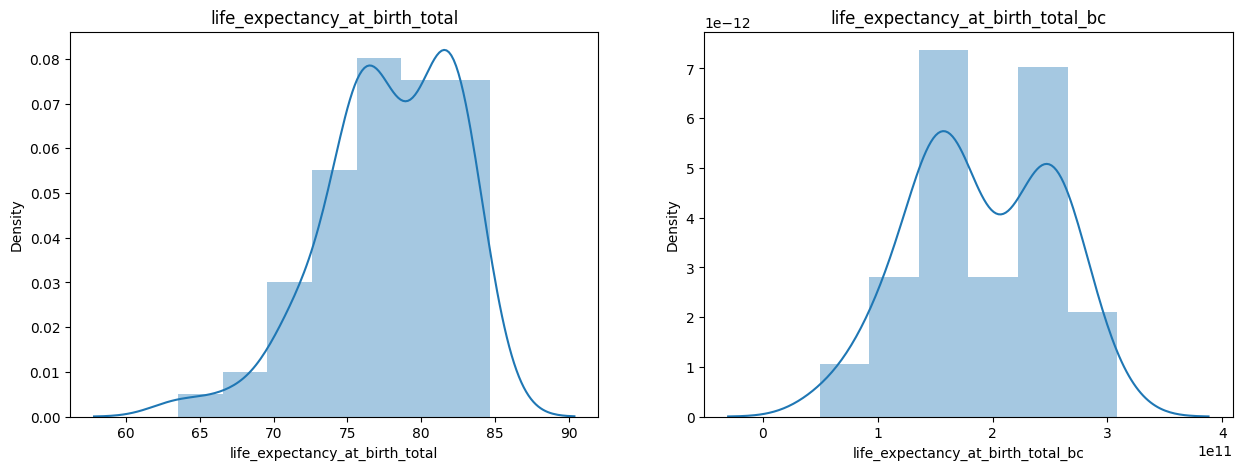

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('life_expectancy_at_birth_total')
axes[1].set_title('life_expectancy_at_birth_total_bc')

sns.distplot(df_socio['life_expectancy_at_birth_total'] ,ax = axes[0])
sns.distplot(df_socio['life_expectancy_at_birth_total_bc'], ax = axes[1]);

In [34]:
stats.shapiro(df_socio['life_expectancy_at_birth_total_bc'])

ShapiroResult(statistic=0.965214192867279, pvalue=0.06095486134290695)

In [35]:
df_socio.drop('life_expectancy_at_birth_total_sk', axis=1, inplace=True)

In [36]:
df_socio.head()

,country,region,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pollution_index,life_expectancy_at_birth_total,pop_using_improved_drinking_water,life_expectancy_at_birth_total_bc
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.8,73.30,Muchos,139.59,58.40,37.37,53.33,76.372000,97.25,1.596496e+11
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.4,74.25,Medios,176.54,101.94,57.58,24.58,82.500000,100.00,2.611737e+11
2,Austria,WesternEurope,8.736,106.0,58.094,44117.7,11.2,80.91,Muchos,190.37,95.66,80.75,21.90,81.643902,100.00,2.443653e+11
3,Belarus,EasternEurope,9.468,46.7,78.134,5750.8,5.7,53.76,Muchos,119.23,36.43,77.74,39.64,74.129268,94.65,1.320137e+11
4,Belgium,WesternEurope,11.429,377.5,97.961,40277.8,10.6,78.92,Medios,160.52,91.02,55.49,48.92,81.492683,99.45,2.414933e+11


- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [37]:
# Eliminamos de este df la variable respuesta sin normalizar.
# ----------------------------------

df_socio.drop('life_expectancy_at_birth_total', axis = 1, inplace = True)

In [38]:
df_socio.to_csv('../datos/datos-regresion-lineal/3-esperanza_vida_normalizado.csv')